# 1. Install and Import Dependencies

In [ ]:
# !pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

In [1]:
# Clone the YOLOv5 repository from GitHub to the local machine
!git clone https://github.com/ultralytics/yolov5

'git' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# Change directory to the YOLOv5 folder and install dependencies
!cd yolov5 && pip install -r requirements.txt

In [ ]:
# Import the PyTorch library for tensor computation and deep learning model development
import torch

# Import the pyplot module from matplotlib for plotting and visualizing data
from matplotlib import pyplot as plt

# Import the numpy library for numerical operations on arrays and matrices
import numpy as np

# Import the OpenCV library for image and video processing
import cv2

# 2. Load Model

In [ ]:
# Load the pre-trained YOLOv5 small model from the Ultralytics YOLOv5 GitHub repository
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.10/dist-packages/torch/hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-6-23 Python-3.10.12 torch-2.3.0+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 121MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
# model

# 3. Make Detections with Images

In [ ]:
img_path = '/content/car.jpg'

# Opening with OpenCV
try:
    img = cv2.imread(img_path)
    if img is not None:
        print("Image loaded successfully with OpenCV")
    else:
        print("OpenCV could not open the image")
except Exception as e:
    print(f"Error occurred: {e}")

Image loaded successfully with OpenCV


In [ ]:
results = model(img)
results.print()

image 1/1: 533x800 1 person, 28 cars, 5 trucks
Speed: 22.1ms pre-process, 338.6ms inference, 32.6ms NMS per image at shape (1, 3, 448, 640)


array([[[174, 216, 251],
        [175, 220, 254],
        [168, 213, 246],
        ...,
        [146, 149, 127],
        [ 55,  79,  67],
        [ 34,  70,  64]],

       [[156, 201, 235],
        [155, 200, 233],
        [142, 189, 221],
        ...,
        [140, 142, 120],
        [ 67,  92,  82],
        [ 16,  52,  46]],

       [[171, 220, 252],
        [164, 213, 245],
        [131, 180, 212],
        ...,
        [154, 155, 135],
        [ 50,  74,  66],
        [ 25,  62,  58]],

       ...,

       [[ 80,  69,  61],
        [ 83,  72,  64],
        [ 80,  69,  61],
        ...,
        [ 56,  52,  47],
        [ 57,  53,  48],
        [ 58,  54,  49]],

       [[ 75,  64,  56],
        [ 91,  80,  72],
        [ 89,  78,  70],
        ...,
        [ 57,  53,  48],
        [ 57,  53,  48],
        [ 59,  55,  50]],

       [[ 83,  72,  64],
        [ 95,  84,  76],
        [ 82,  71,  63],
        ...,
        [ 58,  54,  49],
        [ 58,  54,  49],
        [ 59,  55,  50]]], dtype=uint8)
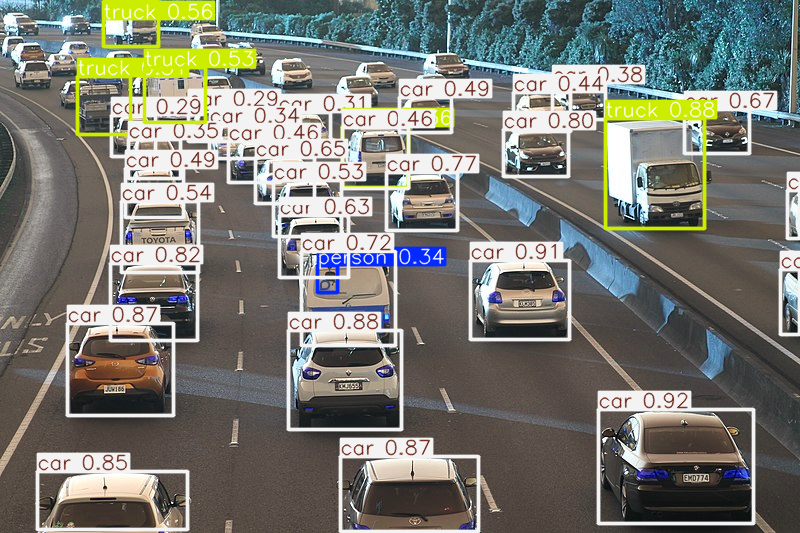

In [ ]:
np.squeeze(results.render())

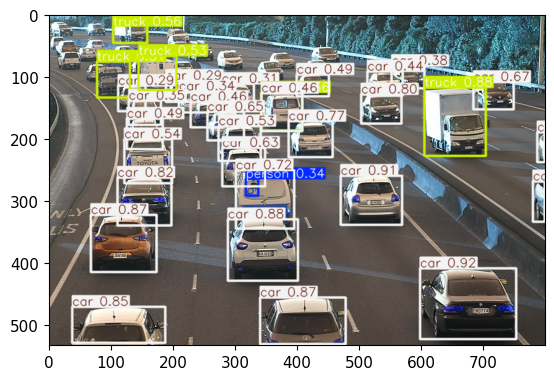

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
# results.render()

# 4. Real Time Detections

In [ ]:
# Open a video capture object for the default camera (0)
cap = cv2.VideoCapture(0)

# Loop to continuously capture frames from the camera
while cap.isOpened():
    ret, frame = cap.read()  # Read a frame from the video capture

    # Check if the frame was read successfully
    if not ret:
        break

    # Make detections using the YOLOv5 model on the current frame
    results = model(frame)

    # Render the detections on the frame and display it using OpenCV
    cv2.imshow('YOLO', np.squeeze(results.render()))

    # Check for the 'q' key to quit the loop and close the program
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Release the video capture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [ ]:
import uuid   # Unique identifier
import os
import time

In [ ]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)

    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))

        # Webcam feed
        ret, frame = cap.read()

        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')

        # Writes out image to file
        cv2.imwrite(imgname, frame)

        # Render to the screen
        cv2.imshow('Image Collection', frame)

        # 2 second delay between captures
        time.sleep(2)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)

In [ ]:
!git clone https://github.com/tzutalin/labelImg

In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

# 6. Load Custom Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\User/.cache\torch\hub\master.zip
YOLOv5  2021-7-11 torch 1.8.1+cu111 CUDA:0 (GeForce RTX 2070 SUPER, 8192.0MB)

Fusing layers... 
Model Summary: 224 layers, 7097062 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [ ]:
img = os.path.join('data', 'images', 'awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg')

In [ ]:
results = model(img)

In [ ]:
results.print()

image 1/1: 480x640 1 awake
Speed: 16.0ms pre-process, 11.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


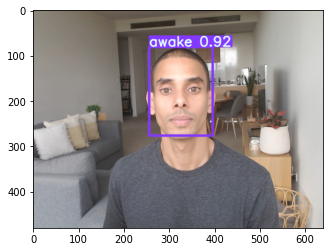

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()